# **机器学习与药物发现（4）随机森林回归模型**

在**第四部分**，我们将使用随机森林算法建立乙酰胆碱酯酶抑制剂的回归模型。

---

## **1. 导入数据库**

In [72]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

## **2. 导入数据**

In [73]:
! wget https://github.com/dataprofessor/data/raw/master/acetylcholinesterase_06_bioactivity_data_3class_pIC50_pubchem_fp.csv

/bin/bash: wget: command not found


In [74]:
df = pd.read_csv('acetylcholinesterase_06_bioactivity_data_3class_pIC50_pubchem_fp.csv.2')

## **3. 输入特征**
乙酰胆碱酯酶数据集包含881个输入特征和1个输出变量（pIC50值）。

### **3.1. 输入特征**

In [75]:
X = df.drop('pIC50', axis=1)
X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4690,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4691,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4692,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4693,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


### **3.2. 输出特征**

In [76]:
Y = df.pIC50
Y

0       6.124939
1       7.000000
2       4.301030
3       6.522879
4       6.096910
          ...   
4690    5.612610
4691    5.595166
4692    5.419075
4693    5.460924
4694    5.555955
Name: pIC50, Length: 4695, dtype: float64

### **3.3. 检查数据结构**

In [77]:
X.shape

(4695, 881)

In [78]:
Y.shape

(4695,)

### **3.4. 移除低差异性特征**

In [79]:
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))    
X = selection.fit_transform(X)

In [80]:
X.shape

(4695, 137)

In [81]:
import pandas as pd
X = pd.DataFrame(X)
Y = pd.DataFrame(Y)

In [82]:
Y.describe()

,pIC50
count,4695.000000
mean,5.820864
std,1.552813
min,1.000000
25%,4.756219
50%,5.648590
75%,6.903090
max,11.221849


In [83]:
import pandas as pd
import numpy as np

def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)

In [84]:
clean_dataset(Y)

,pIC50
0,6.124939
1,7.000000
2,4.301030
3,6.522879
4,6.096910
...,...
4690,5.612610
4691,5.595166
4692,5.419075
4693,5.460924


In [85]:
Y.describe()

,pIC50
count,4695.000000
mean,5.820864
std,1.552813
min,1.000000
25%,4.756219
50%,5.648590
75%,6.903090
max,11.221849


In [86]:
max_value = np.nanmax(Y[Y != np.inf])

In [87]:
Y.replace([np.inf, -np.inf], max_value, inplace=True)

In [88]:
Y=Y.to_numpy()

In [89]:
Y=Y.ravel()

## **4. 数据分割（80/20比例）**

In [90]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [91]:
X_train.shape, Y_train.shape

((3756, 137), (3756,))

In [92]:
X_test.shape, Y_test.shape

((939, 137), (939,))

## **5. 使用随机森林建立回归模型**

In [93]:
model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, Y_train)
r2 = model.score(X_test, Y_test)
r2

0.5290208955630776

In [94]:
Y_pred = model.predict(X_test)

## **6. 实验与预测的pIC50值的散点图**

/Users/xinyili/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<function matplotlib.pyplot.show(close=None, block=None)>

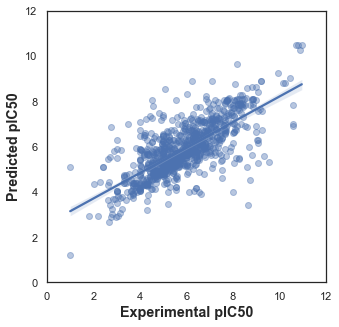

In [95]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(color_codes=True)
sns.set_style("white")

ax = sns.regplot(Y_test, Y_pred, scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')
ax.set_xlim(0, 12)
ax.set_ylim(0, 12)
ax.figure.set_size_inches(5, 5)
plt.show